## Image Alteration Detection using Custom CNN

#### Import libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
print("hello")

hello


#### Defining required parameters

In [2]:
# Parameters
IMG_SIZE = (128, 128)  # Smaller input for faster training
BATCH_SIZE = 16
EPOCHS = 10

# Paths
train_dir = 'dataset/train'
test_dir = 'dataset/test_mixed'

#### Preparing data

In [3]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary',
                                           subset='training')

val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary',
                                         subset='validation')

Found 108 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


#### Define Custom CNN Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Space Tech Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

#### Training model

In [5]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=EPOCHS)

C:\Users\Space Tech Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6677 - loss: 0.5292 - val_accuracy: 0.9259 - val_loss: 0.2448
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - accuracy: 0.9194 - loss: 0.3107 - val_accuracy: 0.9259 - val_loss: 0.2262
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 804ms/step - accuracy: 0.9011 - loss: 0.3119 - val_accuracy: 0.9259 - val_loss: 0.2409
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 844ms/step - accuracy: 0.9381 - loss: 0.1999 - val_accuracy: 0.9259 - val_loss: 0.2463
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 961ms/step - accuracy: 0.9466 - loss: 0.1621 - val_accuracy: 0.9259 - val_loss: 0.2211
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 917ms/step - accuracy: 0.8878 - loss: 0.1279 - val_accuracy: 0.9259 - val_loss: 0.1633
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 876ms/step - accuracy: 0.9449 - loss: 0.0659 - val_accuracy: 0.9259 - val_loss: 0.2336
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 782ms/step - accuracy: 0.9444 - loss: 0.0605 - val_accuracy: 0.9259 - val_loss: 0

#### Visualize Training

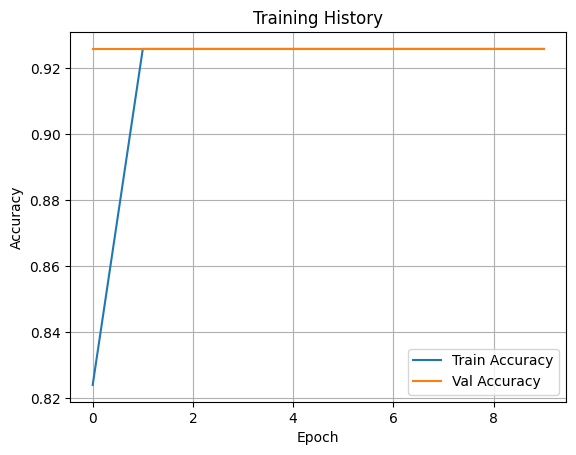

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Predicting on Mixed Folder

In [7]:
def predict_mixed_folder(test_dir):
    results = []
    for fname in os.listdir(test_dir):
        path = os.path.join(test_dir, fname)
        img = load_img(path, target_size=IMG_SIZE)
        arr = img_to_array(img) / 255.0
        arr = np.expand_dims(arr, axis=0)
        prob = model.predict(arr)[0][0]
        label = 'Fake' if prob > 0.5 else 'Real'
        results.append((fname, label, prob))
    return results

#### Showing the result

In [9]:
# Run and show results
results = predict_mixed_folder(test_dir)
for fname, label, prob in results:
    print(f"{fname}: {label} ({prob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
test 01.jpeg: Real (0.00)
test 10.jpeg: Real (0.00)
test 11.jpeg: Real (0.00)
test 12.jpeg: Real (0.00)
test 13.jpeg: Real (0